In [11]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import sys
from PIL import Image
import cv2
import numpy as np
import torch 
import torchvision.transforms as transforms 
from PIL import Image 

sys.path.append('..')

from src.data.generate import generate_half_circle_image
from src.data.utils import get_image_paths
from src.data.transforms import RandomDilateTransform, TRAIN_TRANSFORMS, TEST_TRANSFORMS

/Users/alexandrepoupeau/.pyenv/versions/3.11.10/envs/aitt-symb-venv/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [2]:
image_filepath = '../data//other/quick_draw_subset/airplane/airplane_4527275041095680.png'
img = Image.open(image_filepath)
img.size

(128, 128)

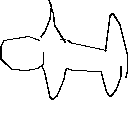

In [3]:
img

In [4]:
images_filepaths = get_image_paths(directory="/Users/alexandrepoupeau/Documents/work/code/halfcircle-clf/data/")

In [5]:
len(images_filepaths)

0

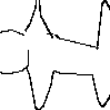

In [6]:
# Read image 
image = Image.open('../data/other/quick_draw_subset/airplane/airplane_4527275041095680.png') 
  
# create an transform for crop the image 
# 300px height and 600px wide 
transform = transforms.RandomResizedCrop(size=110, scale=(0.5, 1.0)) 
  
# use above created transform to crop 
# the image 
image_crop = transform(image) 
  
# display result 
image_crop

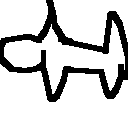

In [7]:
# Read image 
image = Image.open('../data/other/quick_draw_subset/airplane/airplane_4527275041095680.png') 
  
# create an transform for crop the image 
# 300px height and 600px wide 
transform = transforms.Compose([
    transforms.ToTensor(), 
    RandomDilateTransform(min_kernel=3, max_kernel=7, p=1),
    transforms.ToPILImage()
])
  
# use above created transform to crop 
# the image 
image_crop = transform(image) 
  
# display result 
image_crop

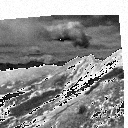

In [95]:
# Read image 
# image = Image.open('../data/halfcircle-images/halfcircle_0.png')
image = Image.open('../data/other/quick_draw_subset/airplane/airplane_4527275041095680.png')
image = Image.open('../data/other/picsum/picsum_5.png')

  
# create an transform for crop the image 
# 300px height and 600px wide 
transform = TRAIN_TRANSFORMS
  
# use above created transform to crop 
# the image 
image_crop = transform(image) 
  
# display result 
img = transforms.ToPILImage()(image_crop)
img

In [37]:
# ensure thresolhding operates correctly
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

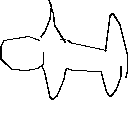

In [38]:
# Read image 
# image = Image.open('../data/halfcircle-images/halfcircle_0.png')
image = Image.open('../data/other/quick_draw_subset/airplane/airplane_4527275041095680.png') 
  
# create an transform for crop the image
# 300px height and 600px wide 
transform = TEST_TRANSFORMS
  
# use above created transform to crop 
# the image 
image_crop = transform(image) 
  
# display result 
transforms.ToPILImage()(image_crop)